<a href="https://colab.research.google.com/github/bsong75/brendensong.github.io/blob/main/2_b_LR_StPaul_Policing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
paul=pd.read_csv('/content/stpaul.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
paul.dtypes

raw_row_number         object
date                   object
time                   object
lat                   float64
lng                   float64
police_grid_number      int64
subject_age           float64
subject_race           object
subject_sex            object
type                   object
citation_issued        object
outcome                object
frisk_performed          bool
search_conducted         bool
search_vehicle         object
raw_race_of_driver     object
dtype: object

In [4]:
paul.isnull().sum()

raw_row_number             0
date                       0
time                       0
lat                       44
lng                       44
police_grid_number         0
subject_age           184117
subject_race           35126
subject_sex            31972
type                       0
citation_issued            2
outcome               182567
frisk_performed            0
search_conducted           0
search_vehicle             0
raw_race_of_driver         1
dtype: int64

In [5]:
paul.describe()

,lat,lng,police_grid_number,subject_age
count,211937.000000,211937.000000,211981.000000,27864.000000
mean,44.958006,-93.102808,99.193107,32.407838
std,0.018447,0.044684,56.131500,12.057744
min,44.896841,-93.204229,1.000000,10.000000
25%,44.950851,-93.131400,58.000000,23.000000
50%,44.959361,-93.102077,89.000000,29.000000
75%,44.973116,-93.071036,126.000000,39.000000
max,44.988419,-93.006650,280.000000,90.000000


In [6]:
paul.subject_race.value_counts(normalize=True)

white                     0.466947
black                     0.346860
asian/pacific islander    0.098035
hispanic                  0.078245
other                     0.009912
Name: subject_race, dtype: float64

In [7]:
paul.groupby('subject_sex').citation_issued.value_counts(normalize=True)

subject_sex  citation_issued
female       False              0.871042
             True               0.128958
male         False              0.863046
             True               0.136954
Name: citation_issued, dtype: float64

In [9]:
paul.groupby('subject_sex').frisk_performed.value_counts(normalize=True)

subject_sex  frisk_performed
female       False              0.960947
             True               0.039053
male         False              0.865044
             True               0.134956
Name: frisk_performed, dtype: float64

In [8]:
paul.groupby('subject_race').citation_issued.value_counts(normalize=True)

subject_race            citation_issued
asian/pacific islander  False              0.861460
                        True               0.138540
black                   False              0.819102
                        True               0.180898
hispanic                False              0.838994
                        True               0.161006
other                   False              0.820878
                        True               0.179122
white                   False              0.903902
                        True               0.096098
Name: citation_issued, dtype: float64

In [10]:
paul.groupby('subject_race').frisk_performed.value_counts(normalize=True)

subject_race            frisk_performed
asian/pacific islander  False              0.927500
                        True               0.072500
black                   False              0.849635
                        True               0.150365
hispanic                False              0.862047
                        True               0.137953
other                   False              0.908728
                        True               0.091272
white                   False              0.925165
                        True               0.074835
Name: frisk_performed, dtype: float64

In [11]:
paul.groupby('subject_race').search_conducted.value_counts(normalize=True)

subject_race            search_conducted
asian/pacific islander  False               0.947399
                        True                0.052601
black                   False               0.887731
                        True                0.112269
hispanic                False               0.905622
                        True                0.094378
other                   False               0.936110
                        True                0.063890
white                   False               0.945606
                        True                0.054394
Name: search_conducted, dtype: float64

In [12]:
paul.groupby('subject_race').search_vehicle.value_counts(normalize=True)

subject_race            search_vehicle                                                            
asian/pacific islander  False                                                                         0.731053
                        FALSE                                                                         0.216346
                        True                                                                          0.039336
                        TRUE                                                                          0.013266
black                   False                                                                         0.690760
                        FALSE                                                                         0.196955
                        True                                                                          0.087327
                        TRUE                                                                          0.024941
             

In [13]:
paul.groupby('subject_race').outcome.value_counts(normalize=True)

subject_race            outcome 
asian/pacific islander  citation    1.0
black                   citation    1.0
hispanic                citation    1.0
other                   citation    1.0
white                   citation    1.0
Name: outcome, dtype: float64

In [14]:
paul.outcome.value_counts(normalize=True)

citation    1.0
Name: outcome, dtype: float64

In [16]:
#time of day impact
combined=paul.date.str.cat(paul.time, sep= ' ')
combined

0           1/1/2001 1:13:00
1           1/1/2001 1:14:00
2           1/1/2001 1:47:00
3           1/1/2001 2:22:00
4          1/1/2001 15:01:00
                 ...        
211976    4/14/2007 23:31:00
211977    4/14/2007 23:32:00
211978    4/14/2007 23:37:00
211979    4/14/2007 23:42:00
211980    4/14/2007 23:45:00
Name: date, Length: 211981, dtype: object

In [17]:
paul['stop_datetime']= pd.to_datetime(combined)
paul.stop_datetime.dt.year.value_counts()

2004    18421
2012    17137
2003    16307
2001    15803
2002    15758
2005    14541
2010    14191
2006    12468
2011    12236
2009    11999
2013    11944
2015    11047
2008    10708
2016    10252
2014     9952
2007     9217
Name: stop_datetime, dtype: int64

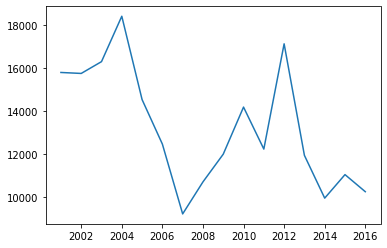

In [18]:
paul.stop_datetime.dt.year.value_counts().sort_index().plot()

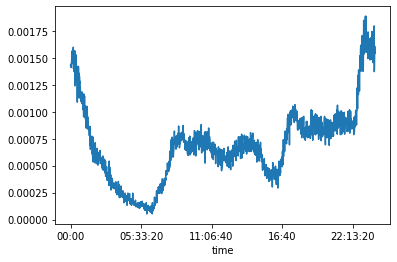

In [19]:
paul.stop_datetime.dt.time.value_counts(normalize=True).plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcec3d4e4a8>,
      dtype=object)

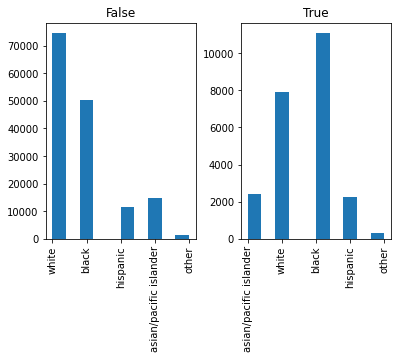

In [20]:
paul.hist('subject_race', by='citation_issued')